In [2]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np
import qgrid
import beakerx as bx
from datetime import datetime as dtt

from pa_lib.file import data_files, load_bin, store_bin, store_excel
from pa_lib.data import calc_col_partitioned, clean_up_categoricals, flatten, replace_col, cond_col, desc_col
from pa_lib.util import obj_size
from pa_lib.log  import time_log
from pa_lib.types import dtFactor

# display long columns completely
pd.set_option('display.max_colwidth', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data_files()

,size,mtime
name,,
bd_by_week.feather,30.9 MB,30.04.19 16:18:15
bd_data.csv.zip,152.0 MB,02.05.19 11:51:59
bd_data.feather,197.1 MB,02.05.19 11:52:09
bd_data_raw.feather,328.0 MB,02.05.19 11:52:00
bd_data_vkprog.feather,69.2 MB,02.05.19 11:52:12
crm_data.feather,51.6 MB,30.04.19 10:41:44
crm_data_vkprog.feather,42.7 MB,30.04.19 10:41:45
plz_data.feather,135.7 KB,30.04.19 08:50:46
pv_akw_netto.feather,12.1 MB,16.04.19 16:16:31


In [54]:
bd = load_bin('bd_data.feather')

2019-05-02 16:47:18 [INFO] Reading from file /home/pa/data/bd_data.feather
2019-05-02 16:47:18 [INFO] Finished loading binary file in 0.21s (0.51s CPU)


In [6]:
desc_col(bd, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/1498376,41324,7.3 MB,"[100034,655106]"
ENDKUNDE,category,0/1498376,38736,10.0 MB,"[ IWIKO - Institut für Wirtschafts-Komm.,ô quai des arts]"
EK_ABC,category,5395/1492981,8,1.4 MB,"[nan,NO]"
EK_PLZ,category,398/1497978,3452,3.2 MB,"[nan,WC2H OBA 1]"
EK_ORT,category,397/1497979,3491,3.2 MB,"[nan,genève]"
EK_LAND,category,397/1497979,59,1.4 MB,"[nan,USA]"
EK_HB_APG_KURZZ,category,105034/1393342,94,1.4 MB,"[nan,YIL]"
EK_AKTIV,category,0/1498376,2,1.4 MB,"[0,1]"
AGENTUR,category,755613/742763,4556,3.4 MB,"[nan,Österreich Werbung]"
VERKAUFSBERATER,category,0/1498376,176,2.9 MB,"[ABB,ZHU]"


#### Filtered data: Only above-zero

In [55]:
bd = bd.loc[(bd.NETTO >= 0)].pipe(clean_up_categoricals)

#### Reduced data: Only from 2014, only non-zero

In [56]:
data = bd.loc[(bd.KAMP_ERFASS_JAHR > 2014)].pipe(clean_up_categoricals)

#### Set up plotting

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 90
plt.rcParams['figure.figsize'] = [15, 10]

### Plots

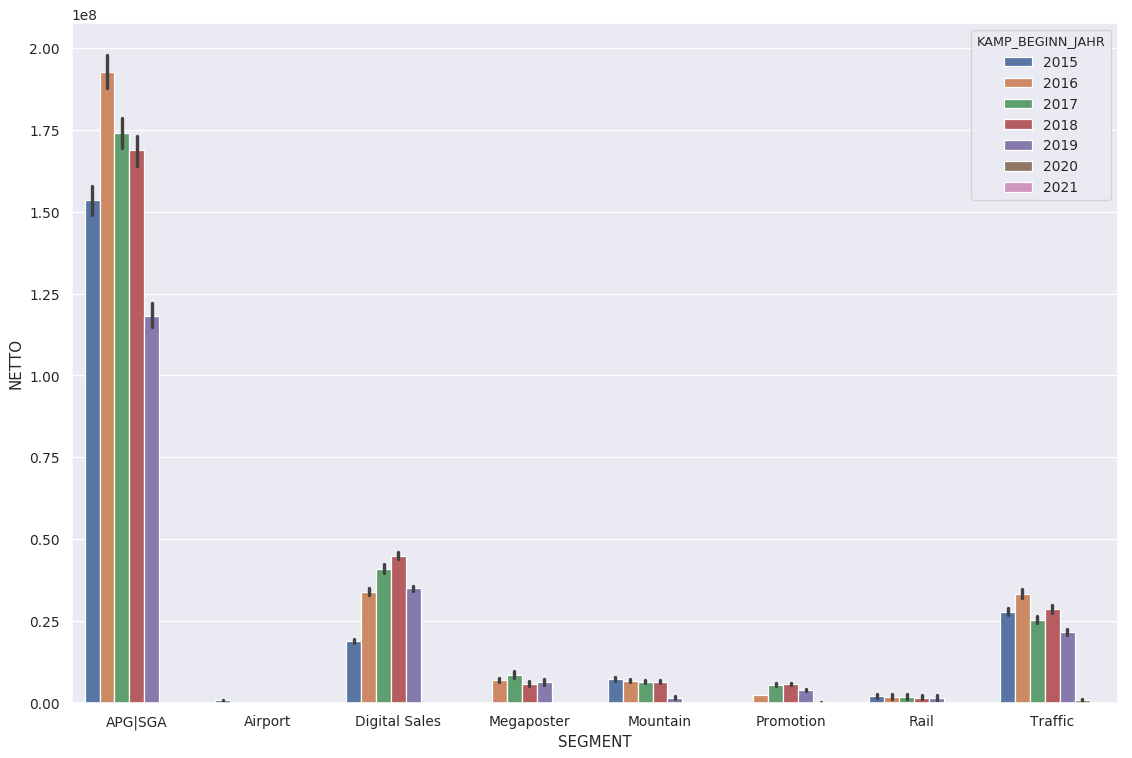

In [50]:
sns.barplot(data=data, x="SEGMENT", y="NETTO", hue='KAMP_BEGINN_JAHR', estimator=np.sum)

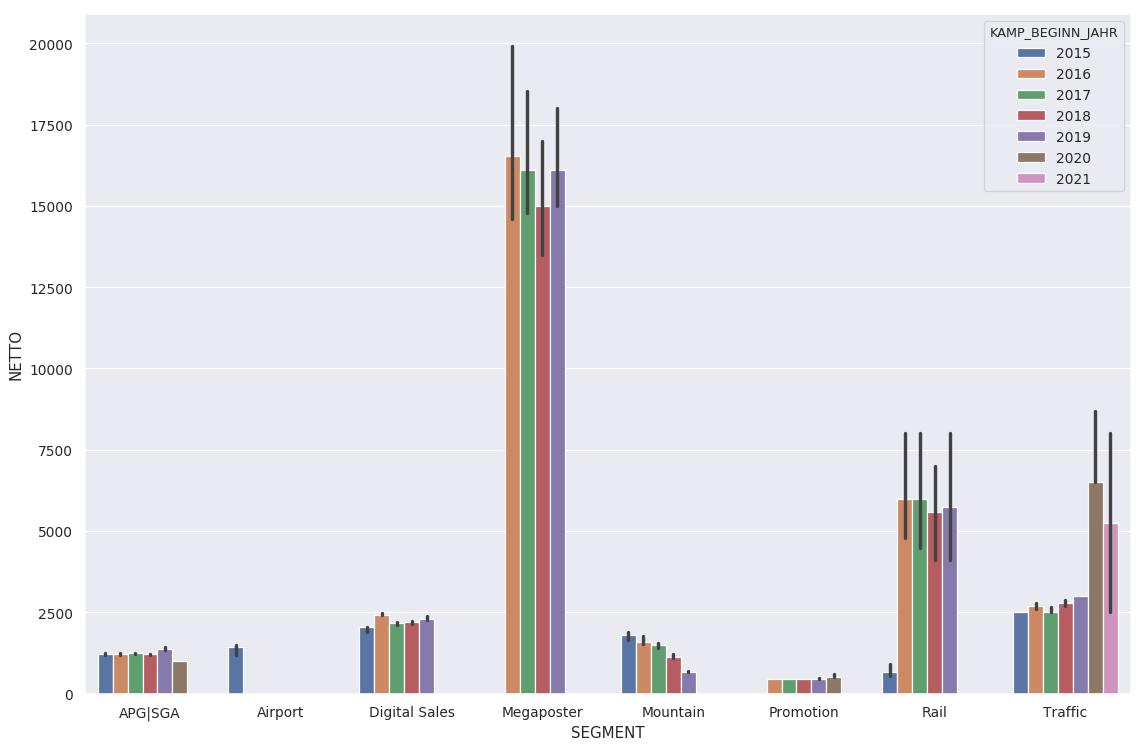

In [51]:
sns.barplot(data=data, x="SEGMENT", y="NETTO", hue='KAMP_BEGINN_JAHR', estimator=np.median)

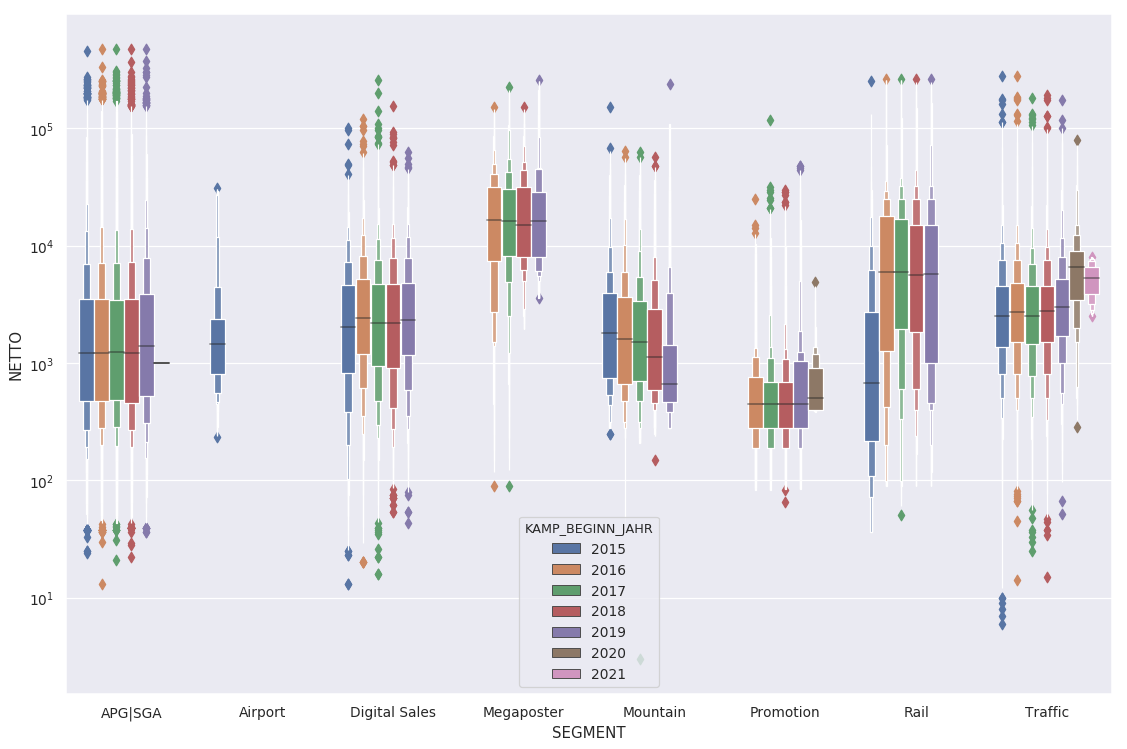

In [52]:
plt.yscale('log')
sns.boxenplot(data=data, x='SEGMENT', y='NETTO', hue='KAMP_BEGINN_JAHR')

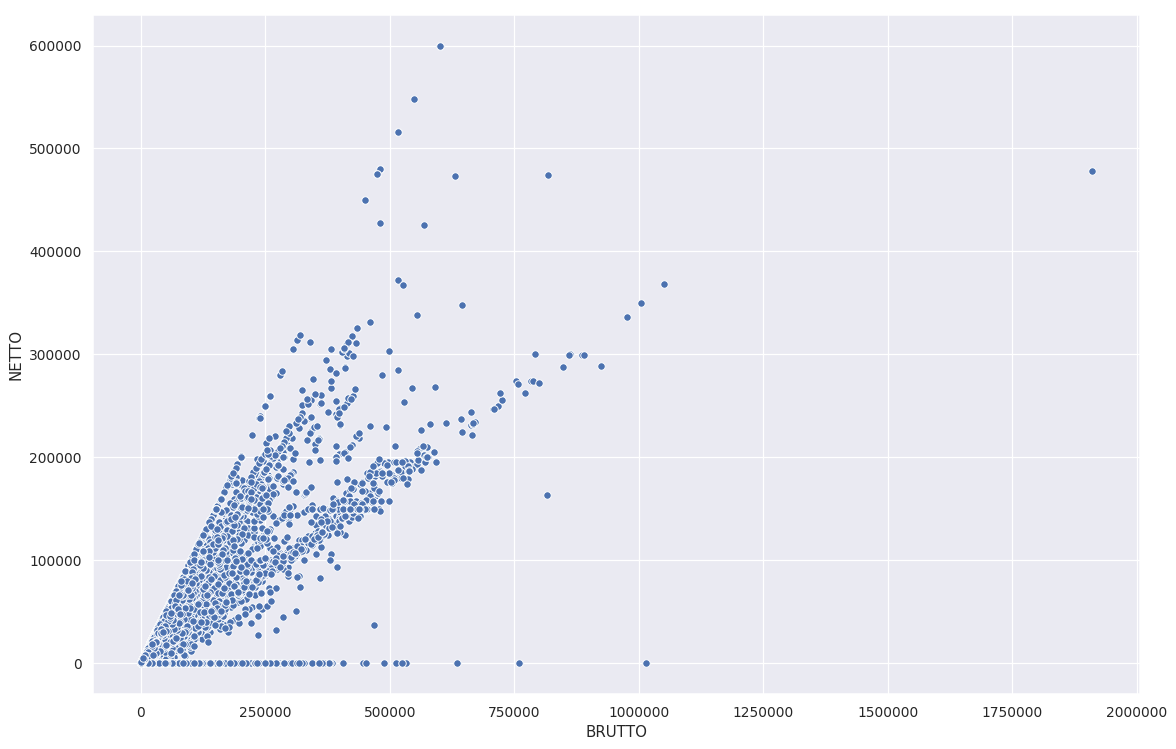

In [58]:
sns.scatterplot(x=bd.BRUTTO, y=bd.NETTO)

In [17]:
desc_col(data, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/301355,19141,13.6 MB,"[100034,655106]"
ENDKUNDE,category,0/301355,18241,14.9 MB,"[""einfach-luxuriös"",ängelibeck]"
EK_ABC,category,16/301339,8,12.6 MB,"[nan,NO]"
EK_PLZ,category,36/301319,2415,13.1 MB,"[nan,WC2E 9JL]"
EK_ORT,category,36/301319,2386,13.1 MB,"[nan,Zürich Mülligen]"
EK_LAND,category,36/301319,36,12.6 MB,"[nan,USA]"
EK_HB_APG_KURZZ,category,16694/284661,50,12.6 MB,"[nan,YAM]"
EK_AKTIV,category,0/301355,2,12.6 MB,"[0,1]"
AGENTUR,category,152015/149340,2079,13.1 MB,"[nan,Österreich Werbung]"
VERKAUFSBERATER,category,0/301355,109,12.6 MB,"[ABS,ZHU]"


In [10]:
data.KAMP_BEGINN_JAHR.value_counts(dropna=False)

2018.0    68848
2017.0    67934
2016.0    66295
2015.0    51896
2019.0    44243
NaN        1993
2020.0      144
2021.0        2
Name: KAMP_BEGINN_JAHR, dtype: int64

In [18]:
data.loc[data.KAMP_BEGINN_JAHR.isna()]['KAMP_ERFASS_JAHR'].value_counts()

2019    1969
2018      24
2017       0
2016       0
2015       0
Name: KAMP_ERFASS_JAHR, dtype: int64

/home/pa/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/pa/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


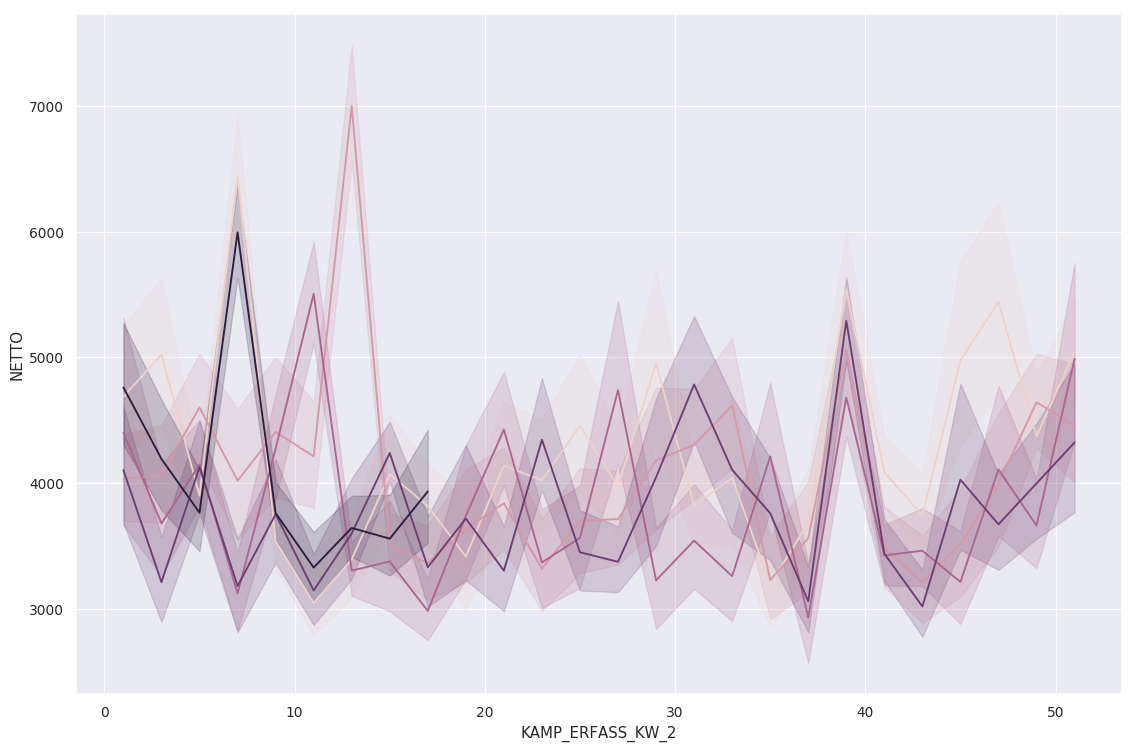

In [19]:
sns.lineplot(x=data.KAMP_ERFASS_KW_2, y=data.NETTO, hue=data.KAMP_ERFASS_JAHR, legend=False)

### Netto Reservation und Aushang per Endkunde und KW2

In [20]:
from concurrent.futures import ProcessPoolExecutor

def sum_calc(param):
    (df, col_year, col_week) = param
    return (df.groupby(['ENDKUNDE_NR', col_year, col_week], observed=False, as_index=False)[['NETTO']].agg('sum'))

with time_log('calculating sums'):
    with ProcessPoolExecutor(max_workers=2) as executor:
        (data_res, data_aus) = tuple(executor.map(sum_calc, [(data, 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'), 
                                                             (data, 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2')]))

    data_by_week = (data_res.merge(data_aus,  
                                   left_on=['ENDKUNDE_NR', 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'], 
                                   right_on=['ENDKUNDE_NR', 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], 
                                   how='outer', suffixes=('_res', '_aus'))
                            .rename({'KAMP_ERFASS_JAHR': 'Jahr', 'KAMP_ERFASS_KW_2': 'Kw', 'NETTO_res': 'Res', 'NETTO_aus': 'Aus'}, 
                                    axis='columns'))

    data_by_week = (data_by_week.fillna({'Jahr': data_by_week.KAMP_BEGINN_JAHR, 'Kw': data_by_week.KAMP_BEGINN_KW_2, 'Res': 0, 'Aus': 0})
                                .drop(['KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], axis='columns')
                                .sort_values(['Jahr', 'ENDKUNDE_NR', 'Kw'])
                                .reset_index(drop=True))

store_bin(data_by_week, 'bd_by_week.feather')

2019-05-02 13:58:48 [INFO] Finished calculating sums in 92.76s (16.22s CPU)
2019-05-02 13:58:48 [INFO] Writing to file /home/pa/data/bd_by_week.feather
2019-05-02 13:58:49 [INFO] Written 66.6 MB
2019-05-02 13:58:49 [INFO] Finished storing binary file in 0.23s (1.52s CPU)


In [ ]:
data_by_week = load_bin('bd_by_week.feather')

In [21]:
desc_col(data_by_week, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/3483662,19141,7.4 MB,"[100034,655106]"
Jahr,category,0/3483662,7,3.3 MB,"[2015,2021]"
Kw,category,0/3483662,26,3.3 MB,"[1,51]"
Res,float64,0/3483662,20271,26.6 MB,"[0.0,6770961.0]"
Aus,float64,0/3483662,20530,26.6 MB,"[0.0,1636724.0]"


In [27]:
data_non_zero = (data_by_week
                 .query('Res > 0 or Aus > 0')
                 .pipe(clean_up_categoricals))

ek_minmax = (data_non_zero
             .assign(Jahr_Kw = data_non_zero.Jahr.astype('str').str.cat(
                               data_non_zero.Kw.astype('str'), sep='_')
                               .str.replace(r'_(\d)$', r'_0\g<1>') # make Kw two digits for sorting
                               .astype('str'))
             .drop(['Kw', 'Jahr'], axis='columns')
             .groupby('ENDKUNDE_NR')
             .agg({'Res': 'sum', 'Aus': 'sum', 'Jahr_Kw': ['min', 'max']}))

In [28]:
cols = [f'{fld}_{agg}' for (fld, agg) in ek_minmax.columns.to_flat_index()]
ek_minmax.set_axis(labels=cols, axis='columns', inplace=True)

In [29]:
qgrid.set_grid_option('minVisibleRows', 1)
qgrid.set_grid_option('maxVisibleRows', 20)

qgrid.show_grid(ek_minmax)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Vollständige Daten per Woche

In [64]:
from concurrent.futures import ProcessPoolExecutor

def sum_calc(param):
    (df, col_year, col_week) = param
    return (df.groupby(['ENDKUNDE_NR', col_year, col_week], observed=True, as_index=False)[['NETTO']].agg('sum'))

with time_log('calculating sums'):
    with ProcessPoolExecutor(max_workers=2) as executor:
        (bd_res,bd_aus) = tuple(executor.map(sum_calc, [(bd, 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'), 
                                                        (bd, 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2')]))

    bd_by_week = (bd_res.merge(bd_aus,  
                               left_on=['ENDKUNDE_NR', 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'], 
                               right_on=['ENDKUNDE_NR', 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], 
                               how='outer', suffixes=('_res', '_aus'))
                        .rename({'KAMP_ERFASS_JAHR': 'Jahr', 'KAMP_ERFASS_KW_2': 'Kw', 'NETTO_res': 'Res', 'NETTO_aus': 'Aus'}, 
                                axis='columns'))

    bd_by_week = (bd_by_week.fillna({'Jahr': bd_by_week.KAMP_BEGINN_JAHR, 'Kw': bd_by_week.KAMP_BEGINN_KW_2, 'Res': 0, 'Aus': 0})
                            .drop(['KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], axis='columns')
                            .sort_values(['Jahr', 'ENDKUNDE_NR', 'Kw'])
                            .reset_index(drop=True))

store_bin(bd_by_week, 'bd_long_by_week.feather')

2019-05-02 16:59:31 [INFO] Finished calculating sums in 1.93s (4.61s CPU)
2019-05-02 16:59:31 [INFO] Writing to file /home/pa/data/bd_long_by_week.feather
2019-05-02 16:59:31 [INFO] Written 9.2 MB
2019-05-02 16:59:31 [INFO] Finished storing binary file in 0.03s (0.25s CPU)


In [65]:
bd_by_week = load_bin('bd_long_by_week.feather')

2019-05-02 16:59:45 [INFO] Reading from file /home/pa/data/bd_long_by_week.feather
2019-05-02 16:59:45 [INFO] Finished loading binary file in 0.01s (0.02s CPU)


In [66]:
desc_col(bd_by_week, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/422234,41323,3.2 MB,"[100034,655106]"
Jahr,category,0/422234,15,413.2 KB,"[2007,2021]"
Kw,category,0/422234,26,413.9 KB,"[1,51]"
Res,float64,0/422234,32616,3.2 MB,"[0.0,6770961.0]"
Aus,float64,0/422234,32858,3.2 MB,"[0.0,1636724.0]"


In [69]:
qgrid.set_grid_option('minVisibleRows', 1)
qgrid.set_grid_option('maxVisibleRows', 20)

qgrid.show_grid(bd_by_week)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [75]:
qgrid.show_grid(bd.loc[(bd.ENDKUNDE_NR==483063) & (bd.KAMP_BEGINN_JAHR==2014) & (bd.KAMP_BEGINN_KW_2.isin([23, 45]))].transpose())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [76]:
bd_non_zero = (bd_by_week
                 .query('Res > 0 or Aus > 0')
                 .pipe(clean_up_categoricals))

ek_minmax = (bd_non_zero
             .assign(Jahr_Kw = bd_non_zero.Jahr.astype('str').str.cat(
                               bd_non_zero.Kw.astype('str'), sep='_')
                               .str.replace(r'_(\d)$', r'_0\g<1>') # make Kw two digits for sorting
                               .astype('str'))
             .drop(['Kw', 'Jahr'], axis='columns')
             .groupby('ENDKUNDE_NR')
             .agg({'Res': 'sum', 'Aus': 'sum', 'Jahr_Kw': ['min', 'max']}))

In [77]:
cols = [f'{fld}_{agg}' for (fld, agg) in ek_minmax.columns.to_flat_index()]
ek_minmax.set_axis(labels=cols, axis='columns', inplace=True)

In [82]:
ek_minmax.reset_index(inplace=True)
store_bin(ek_minmax, 'bd_ek_minmax.feather')

2019-05-02 17:46:36 [INFO] Writing to file /home/pa/data/bd_ek_minmax.feather
2019-05-02 17:46:36 [INFO] Written 1.4 MB
2019-05-02 17:46:36 [INFO] Finished storing binary file in 0.02s (0.02s CPU)


In [84]:
qgrid.set_grid_option('minVisibleRows', 1)
qgrid.set_grid_option('maxVisibleRows', 20)

qgrid.show_grid(ek_minmax.query('Jahr_Kw_min < "2009_01"'))

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…